In [ ]:
!unzip '/content/drive/MyDrive/Data-Science Edureka/Project/Potato leaf Disease/Potato leaf Disease.zip'

Archive:  /content/drive/MyDrive/Data-Science Edureka/Project/Potato leaf Disease/Potato leaf Disease.zip
  inflating: Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: Potato/Test/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: Potato/Test/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: Potato/Test/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG  
  inflating: Potato/Test/Potato___Early_blight/08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG  
  inflating: Potato/Test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG  
  inflating: Potato/Test/Potat

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Potato/Train',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Potato/Test',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Potato/Valid',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [ ]:
len(train_ds)

29

In [ ]:
class_name = train_ds.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, label_batch in train_ds.take(1):
  print(image_batch[0].numpy())
  # print(label_batch.numpy())

[[[159. 138. 147.]
  [176. 155. 164.]
  [162. 141. 150.]
  ...
  [164. 142. 145.]
  [164. 142. 145.]
  [164. 142. 145.]]

 [[159. 138. 147.]
  [176. 155. 164.]
  [162. 141. 150.]
  ...
  [164. 142. 145.]
  [164. 142. 145.]
  [164. 142. 145.]]

 [[158. 137. 146.]
  [175. 154. 163.]
  [162. 141. 150.]
  ...
  [164. 142. 145.]
  [164. 142. 145.]
  [164. 142. 145.]]

 ...

 [[203. 183. 185.]
  [182. 162. 164.]
  [167. 147. 149.]
  ...
  [169. 145. 145.]
  [169. 145. 145.]
  [169. 145. 145.]]

 [[183. 163. 165.]
  [170. 150. 152.]
  [171. 151. 153.]
  ...
  [161. 140. 139.]
  [161. 140. 139.]
  [161. 140. 139.]]

 [[177. 157. 159.]
  [181. 161. 163.]
  [197. 177. 179.]
  ...
  [158. 137. 136.]
  [158. 137. 136.]
  [158. 137. 136.]]]


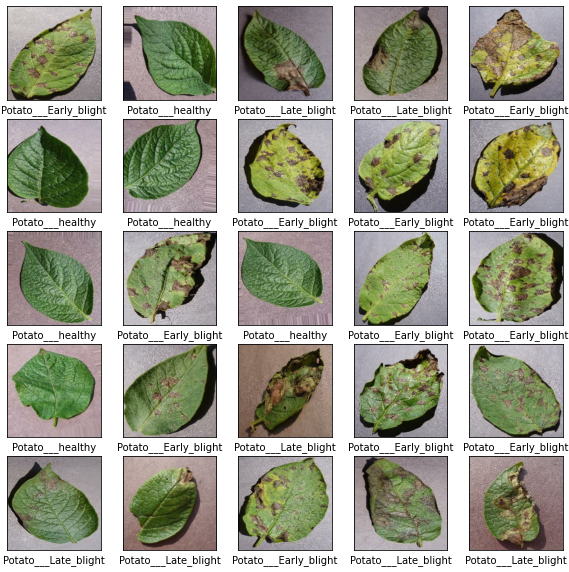

In [ ]:
plt.figure(figsize = (10,10) )
for image_batch, label_batch in train_ds.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    # plt.title(class_name[label_batch[i]])
    plt.xlabel(class_name[label_batch[i]])
    # plt.axis('off')
    plt.xticks([])
    plt.yticks([])


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_name)
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50


29/29 [==============================] - 21s 177ms/step - loss: 1.0893 - accuracy: 0.3344 - val_loss: 1.0366 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 4s 149ms/step - loss: 0.7876 - accuracy: 0.6067 - val_loss: 0.5652 - val_accuracy: 0.7267
Epoch 3/50
29/29 [==============================] - 3s 119ms/step - loss: 0.4589 - accuracy: 0.8122 - val_loss: 0.4164 - val_accuracy: 0.7767
Epoch 4/50
29/29 [==============================] - 3s 120ms/step - loss: 0.4307 - accuracy: 0.8344 - val_loss: 0.3899 - val_accuracy: 0.8100
Epoch 5/50
29/29 [==============================] - 5s 163ms/step - loss: 0.3269 - accuracy: 0.8778 - val_loss: 0.4859 - val_accuracy: 0.8100
Epoch 6/50
29/29 [==============================] - 3s 119ms/step - loss: 0.2865 - accuracy: 0.8744 - val_loss: 0.2651 - val_accuracy: 0.8767
Epoch 7/50
29/29 [==============================] - 3s 120ms/step - loss: 0.2693 - accuracy: 0.8967 - val_loss: 0.2307 - val_accuracy: 0.8933
Epoch 8/50
29/29

In [ ]:
model_json = model.to_json()
with open("Potato_leaf_disease.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("Potato_leaf_disease.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/Potato/Test/Potato___healthy/Potato_healthy-26-_0_4635.jpg'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

########################################
2
Prediction is:  Potato___healthy


In [ ]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

########################################
0
Prediction is:  Potato___Early_blight


In [ ]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/Potato/Test/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

########################################
1
Prediction is:  Potato___Late_blight
